In [41]:
#!pip install statsmodels
#!pip install scikit-image

In [2]:
import pandas as pd
import Config
import skimage.io as sk
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np 
from statsmodels.robust import mad
from PIL import Image 

# Constructing color features for machine learning

#### Making a dataframe from features.csv to get the files id's

In [3]:
img_features_df = pd.read_csv(Config.features_path)
#img_features_df = img_features_df.drop(['area', 'perimeter'], axis=1) #we only need the id
mel_df = pd.read_csv(Config.example_ground_truth_path)

img_features_df['melanoma'] = mel_df['melanoma']

#print(img_features_df[img_features_df['melanoma'] == 1]) #getting the images that show cancer lesions

## Color class
##### input check_variablity2 output: 0, 1, 2

In [43]:
class Color:
    def __init__(self, img, img_bw):
        self.img = img
        self.img_bw = img_bw
    

    def score_variability(self):
        '''
            Assigns a variability score
        '''
        if self._check_variability() < 20: 
            return 0 
        elif self._check_variability() < 50: 
            return 1
        else: 
            return 2

    def _check_variability(self):
        '''
            Returns a mean of the median absolute deviation of each color (rgb)
        '''
        self.img[self.img_bw==0] = 0
        
        #we then calculate the mad of each dimension 
        r, g, b = self.img[:,:,0], self.img[:,:,1], self.img[:,:,2]
        mad_r= mad(r[np.where(r != 0)])
        mad_g= mad(g[np.where(g != 0)])
        mad_b= mad(b[np.where(b != 0)])
        mad_result= [mad_r,mad_g,mad_b]

        #calculating the mean
        return np.mean(mad_result)

### Looping through each image and checking its color

In [51]:
#M,N is the range of images that we choosen (finally it will be 0-# of images)
N = 0
M = 150

mad_lst = [0 for _ in range(M-N)]


#the main for loop which loads the images
for (index, id) in enumerate(img_features_df['id'][N:M]):
    img = plt.imread(f'../data/example_image/{id}.jpg') #main image
    img_bw = plt.imread(f'../data/example_segmentation/{id}_segmentation.png') #main image grayed

    title = f"{id}: {img_features_df[img_features_df['id'] == id]['melanoma'].iloc[0]}"
    is_cancer = img_features_df[img_features_df['id'] == id]['melanoma'].iloc[0]

    #creating an instance of the Color class & applying its functions
    color = Color(img, img_bw)
    mad_lst[index] = (id, color.score_variability(), is_cancer)

<AxesSubplot:>

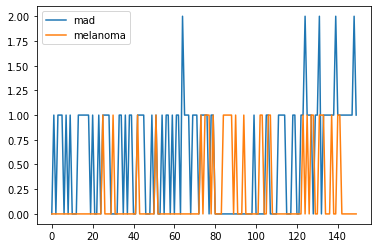

In [52]:

mad_data= pd.DataFrame(mad_lst, columns=['id', 'mad','melanoma'])

mad_data.plot()




In [ ]:
from scipy.stats import pearsonr, spearmanr

mad_data['mad'] = mad_data['mad']
print(spearmanr(mad_data['melanoma'], mad_data['mad']))

SpearmanrResult(correlation=0.04777410252433719, pvalue=0.561545269277163)


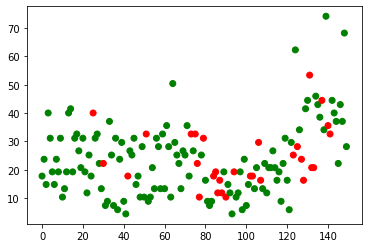

In [ ]:
colors = ["green" if img_features_df['melanoma'][x] == 0.0 else 'red' for x in range(len(img_features_df['melanoma'])) ]
plt.scatter([x for x in range(len(mad_data['mad']))], mad_data['mad'], c=colors)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=932aa97b-f6d2-4889-8f04-d6166675cc2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>